# Smartphone Acceleration Project

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
<a href="#item0"></a>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Clean & Prepare</a>

3. <a href="#item3">Clustering</a>

4. <a href="#item4">Classification</a>
    
5. <a href="#item5">Results</a>

</font>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

%matplotlib inline

Using TensorFlow backend.


1. <a href="#item1">Download and Explore Dataset</a>

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
spark = SparkSession\
    .builder\
    .appName("Cloudant Spark SQL Example in Python using temp tables")\
    .config("cloudant.host",credentials_1['custom_url'].split('@')[1])\
    .config("cloudant.username", credentials_1['username'])\
    .config("cloudant.password",credentials_1['password'])\
    .config("jsonstore.rdd.partitions", 1)\
    .getOrCreate()

In [4]:
df_spark=spark.read.load('train_live', "com.cloudant.spark")
df_spark.createOrReplaceTempView("df")
#spark.sql("SELECT * from df").show()


In [5]:
df = df_spark.toPandas()

In [6]:
df.head()

,Alpha,Beta,CLASS,Gamma,SENSORID,Timestamp,X,Y,Z,_id,_rev
0,204.40,11.70,walk,-25.66,s7max,1550647831014,-0.20,0.78,0.93,1669f04fdcb9dbd77d956be99fb1f974,1-a54707ea18fbe99b08ebcd9f91568e60
1,201.89,13.36,walk,-19.86,s7max,1550647831614,0.00,1.13,-0.27,1669f04fdcb9dbd77d956be99fb20f26,1-1efff5b8662e61aeaecef50d57fe7865
2,217.71,15.48,walk,-12.67,s7max,1550647832323,0.06,0.56,0.22,1669f04fdcb9dbd77d956be99fb221d7,1-f3119a87a930e9de3f7fe14ad975539a
3,222.57,5.26,walk,-23.62,s7max,1550647833018,-0.06,-0.65,0.43,1669f04fdcb9dbd77d956be99fb22ea6,1-75bde845933d0cab39ca5b3fd81e2795
4,220.63,-12.62,walk,-44.31,s7max,1550647833916,-0.39,2.29,-0.83,1669f04fdcb9dbd77d956be99fb23da8,1-ef80383b285b4d93418775c5b48aba8c


In [7]:
#labels_activity = LabelEncoder().fit_transform(df['CLASS'])
labels_activity = df['CLASS'].map( {'sit':0, 'lieondesk':1, 'walk':2})

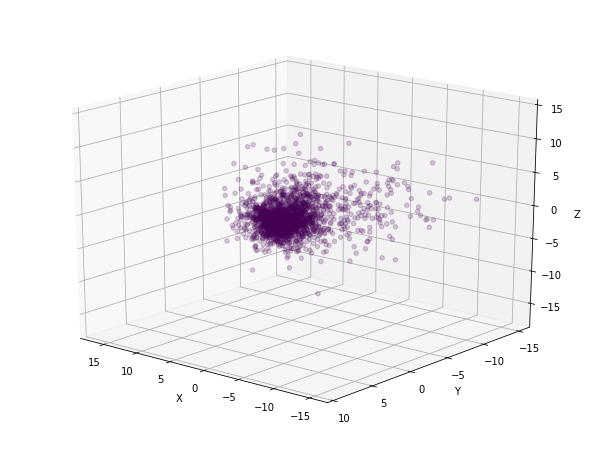

In [8]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=130)

# plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(df["X"], df["Y"], df["Z"], c= labels_activity.astype(np.float), alpha=0.2)


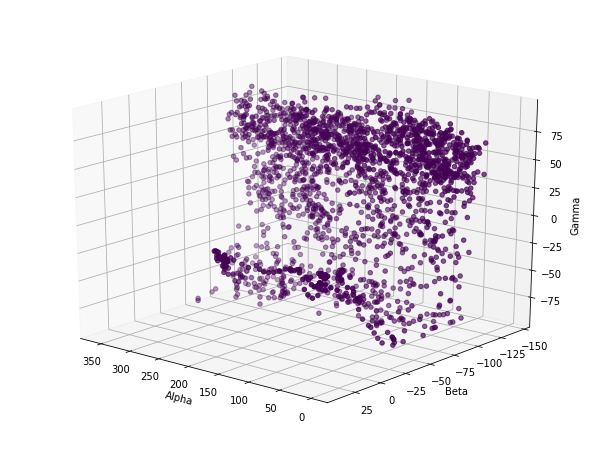

In [9]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=130)

plt.cla()

ax.set_xlabel("Alpha")
ax.set_ylabel("Beta")
ax.set_zlabel("Gamma")

ax.scatter(df["Alpha"], df["Beta"], df["Gamma"], c= labels_activity.astype(np.float))


In [10]:
X = df.loc[:,["X","Y","Z","Alpha", "Beta","Gamma"]]
X.head()

,X,Y,Z,Alpha,Beta,Gamma
0,-0.20,0.78,0.93,204.40,11.70,-25.66
1,0.00,1.13,-0.27,201.89,13.36,-19.86
2,0.06,0.56,0.22,217.71,15.48,-12.67
3,-0.06,-0.65,0.43,222.57,5.26,-23.62
4,-0.39,2.29,-0.83,220.63,-12.62,-44.31


In [11]:
X_norm = StandardScaler().fit_transform(X)
X_norm

array([[-0.04741063,  0.38305848,  0.41993962,  0.02943639,  1.26693491,
        -0.93551478],
       [ 0.02236591,  0.51116553, -0.13007539,  0.00701023,  1.29725645,
        -0.8065366 ],
       [ 0.04329887,  0.30253405,  0.09451407,  0.14835755,  1.33598034,
        -0.64664813],
       ..., 
       [ 0.01189943,  0.09024236, -0.12549193, -1.73874533,  1.06071191,
        -0.36534226],
       [ 0.01189943,  0.09024236, -0.12549193, -1.73874533,  1.06071191,
        -0.36534226],
       [ 0.01189943,  0.09024236, -0.12549193, -1.73874533,  1.06071191,
        -0.36534226]])

In [12]:
cluster = len(df["CLASS"].unique())

In [13]:
cluster = len(df["CLASS"].unique())
k_means = KMeans(init = "k-means++", n_clusters = cluster, n_init = 12)
k_means.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [15]:
X_w_labels = X.copy()

In [16]:
X_w_labels["labels"] = k_means_labels

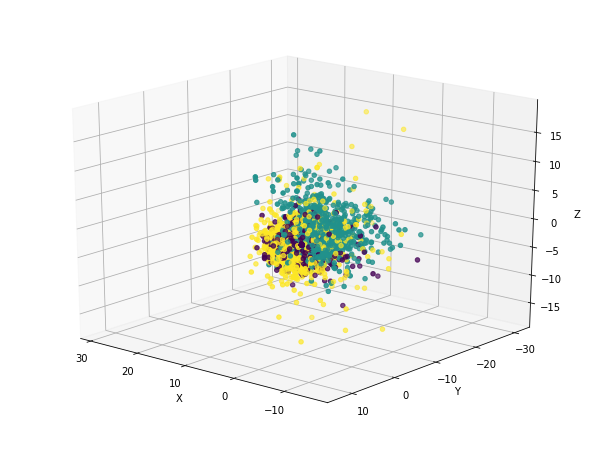

In [17]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=130)

# plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X_w_labels.iloc[:,0],X_w_labels.iloc[:,1],X_w_labels.iloc[:,2], c= k_means_labels.astype(np.float))

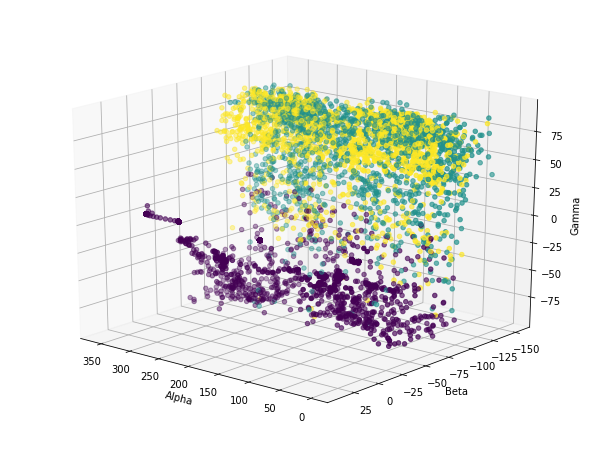

In [18]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=130)

# plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Gamma')

ax.scatter(X_w_labels.iloc[:,3],X_w_labels.iloc[:,4],X_w_labels.iloc[:,5], c= k_means_labels.astype(np.float))

In [19]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
db = DBSCAN(eps=0.05, min_samples=10).fit(X_norm)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscan_labels = db.labels_


realClusterNum=len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
clusterNum = len(set(dbscan_labels))

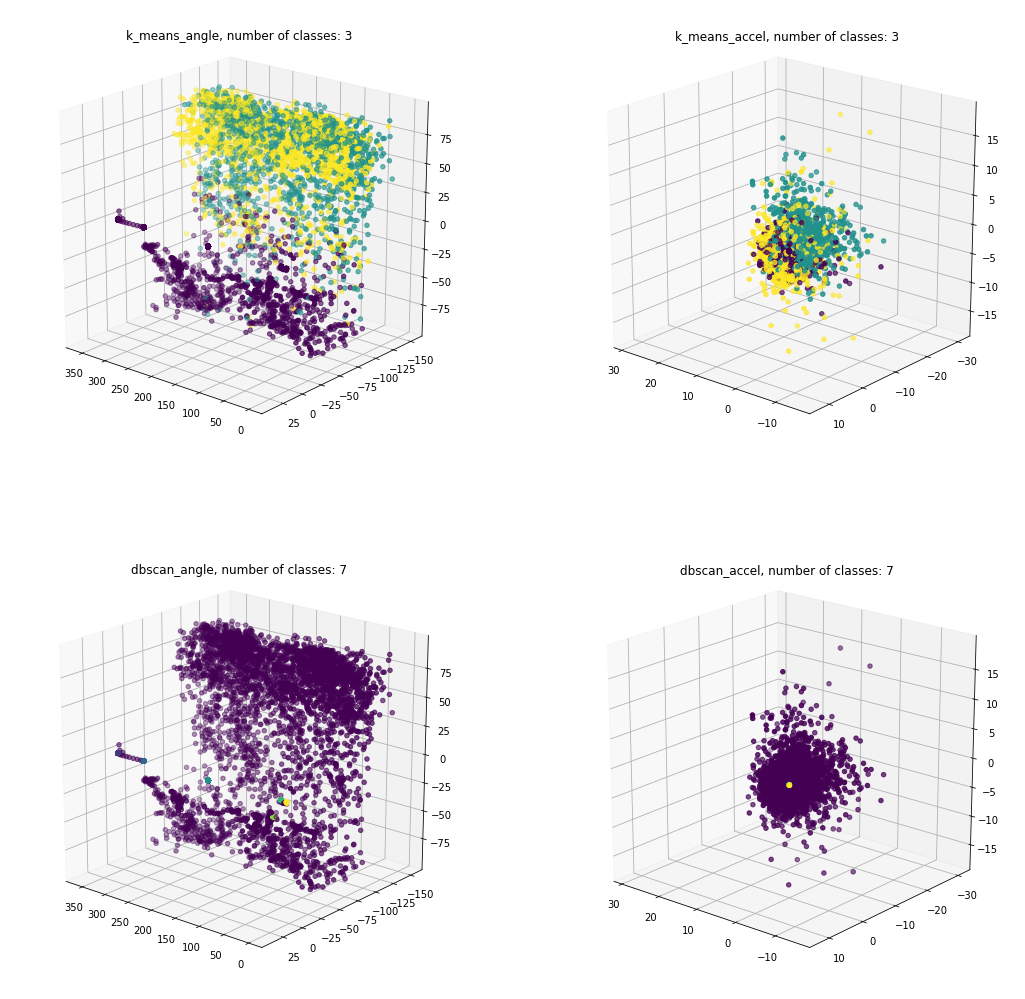

In [20]:

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(18,18))

#===============
#  First subplot
#===============
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.elev = 20
ax.azim = 130
ax.set_title("k_means_angle, number of classes: "+str(len(set(k_means_labels))))

scatter_unnorm = ax.scatter(X_w_labels.iloc[:,3],X_w_labels.iloc[:,4],X_w_labels.iloc[:,5], c= k_means_labels.astype(np.float))

#===============
# Second subplot
#===============
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.elev = 20
ax.azim = 130
ax.set_title("k_means_accel, number of classes: "+str(len(set(k_means_labels))))

ax.scatter(X_w_labels.iloc[:,0],X_w_labels.iloc[:,1],X_w_labels.iloc[:,2], c= k_means_labels.astype(np.float))

#===============
#  Third subplot
#===============
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.elev = 20
ax.azim = 130
ax.set_title("dbscan_angle, number of classes: "+str(len(set(dbscan_labels))))

scatter_unnorm = ax.scatter(X_w_labels.iloc[:,3],X_w_labels.iloc[:,4],X_w_labels.iloc[:,5], c= dbscan_labels.astype(np.float))

#===============
# Fourth subplot
#===============
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.elev = 20
ax.azim = 130
ax.set_title("dbscan_accel, number of classes: "+str(len(set(dbscan_labels))))

ax.scatter(X_w_labels.iloc[:,0],X_w_labels.iloc[:,1],X_w_labels.iloc[:,2], c= dbscan_labels.astype(np.float))

plt.show()


In [21]:
df.groupby("CLASS").count()

,Alpha,Beta,Gamma,SENSORID,Timestamp,X,Y,Z,_id,_rev
CLASS,,,,,,,,,,
lying,2861,2861,2861,2861,2861,2861,2861,2861,2861,2861
stairs,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
walk,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069


In [22]:
df.head()

,Alpha,Beta,CLASS,Gamma,SENSORID,Timestamp,X,Y,Z,_id,_rev
0,204.40,11.70,walk,-25.66,s7max,1550647831014,-0.20,0.78,0.93,1669f04fdcb9dbd77d956be99fb1f974,1-a54707ea18fbe99b08ebcd9f91568e60
1,201.89,13.36,walk,-19.86,s7max,1550647831614,0.00,1.13,-0.27,1669f04fdcb9dbd77d956be99fb20f26,1-1efff5b8662e61aeaecef50d57fe7865
2,217.71,15.48,walk,-12.67,s7max,1550647832323,0.06,0.56,0.22,1669f04fdcb9dbd77d956be99fb221d7,1-f3119a87a930e9de3f7fe14ad975539a
3,222.57,5.26,walk,-23.62,s7max,1550647833018,-0.06,-0.65,0.43,1669f04fdcb9dbd77d956be99fb22ea6,1-75bde845933d0cab39ca5b3fd81e2795
4,220.63,-12.62,walk,-44.31,s7max,1550647833916,-0.39,2.29,-0.83,1669f04fdcb9dbd77d956be99fb23da8,1-ef80383b285b4d93418775c5b48aba8c


In [23]:
def aggregate_data(df,entries_to_agg=5):
    df_new = pd.DataFrame()
    my_list = []
    my_list_labels = []
    my_timestamps = []
    for i in range(0,len(df.index),entries_to_agg):
        my_list.append(df.iloc[i:i+entries_to_agg,[0,1,3,6,7,8]].values)
        my_list_labels.append(df.iloc[i:i+entries_to_agg,2].values)
        my_timestamps.append((df.iloc[i:i+entries_to_agg,5].values))
    df_new[1] = my_list
    df_new[2] = my_list_labels
    df_new[3] = my_timestamps

    all_data = []
    all_labels = []
    all_timestamps = []
    for i in range(0,len(df_new)-5,1):
        x = np.concatenate((df_new[1][i]), axis=None)
        y = np.concatenate((df_new[2][i]), axis=None)
        t = np.concatenate((df_new[3][i]), axis=None)
        all_data.append(x)
        all_labels.append(y[0])
        all_timestamps.append(t[0])
    return all_data, all_labels, all_timestamps

In [24]:
train_X_agg, train_y_agg, timestamps =aggregate_data(df)

In [25]:
set(train_y_agg)

{'lying', 'stairs', 'walk'}

### 1. Random Forest

In [26]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [2,3,4,5,6,7,8,10,13,15],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1,3, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=10)
grid.fit(train_X_agg, train_y_agg)
                   
best_params = grid.best_params_
best_score = grid.best_score_
best_model_RandomForest = grid.best_estimator_

best_score

0.89882697947214074

### 2. Feed Forward NN

In [27]:
train_y_agg_df = pd.DataFrame(train_y_agg).reset_index()
dummy_labels = pd.get_dummies(train_y_agg_df)
train_y_one_hot = np.array(dummy_labels.iloc[:,1:4])

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback

dimensions = len(train_X_agg[0])
ouput = len(train_y_one_hot[0])

class PrintDot(Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

early_stop = EarlyStopping(monitor='val_loss', patience=50)

NN_model = Sequential()
NN_model.add(Dense(32, activation='relu', input_dim=dimensions))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(3, activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
NN_model.compile(loss='binary_crossentropy',
              optimizer=sgd, metrics=['accuracy'])

NN_model.fit(StandardScaler().fit_transform(np.array(train_X_agg)), train_y_one_hot, epochs=1000,verbose=1, batch_size=32, validation_split = 0.2,
                    callbacks=[early_stop, PrintDot()])



Train on 1091 samples, validate on 273 samples
Epoch 1/1000
1091/1091 [==============================] - 0s - loss: 0.5954 - acc: 0.7110 - val_loss: 0.4533 - val_acc: 0.8376
Epoch 2/1000
1091/1091 [==============================] - 0s - loss: 0.4416 - acc: 0.7968 - val_loss: 0.3274 - val_acc: 0.8425
Epoch 3/1000
1091/1091 [==============================] - 0s - loss: 0.3836 - acc: 0.7977 - val_loss: 0.2895 - val_acc: 0.8400
Epoch 4/1000
1091/1091 [==============================] - 0s - loss: 0.3636 - acc: 0.8084 - val_loss: 0.2763 - val_acc: 0.8486
Epoch 5/1000
1091/1091 [==============================] - 0s - loss: 0.3539 - acc: 0.8136 - val_loss: 0.2687 - val_acc: 0.8535
Epoch 6/1000
1091/1091 [==============================] - 0s - loss: 0.3437 - acc: 0.8210 - val_loss: 0.2634 - val_acc: 0.8596
Epoch 7/1000
1091/1091 [==============================] - 0s - loss: 0.3374 - acc: 0.8268 - val_loss: 0.2604 - val_acc: 0.8584
Epoch 8/1000
1091/1091 [==============================] - 0s - l

In [78]:
def get_recent_data(sensor_id=None):
    prediction_testdata = []
    X_test_data = pd.DataFrame()
    X_norm_test_data = []
    df_test_data = pd.DataFrame()
    timestamps = []
    
    ##retrieve all data from the test data
    df_spark_testdata=spark.read.load('testingdb', "com.cloudant.spark")
    df_test_data = df_spark_testdata.toPandas()
    print(df_test_data.tail())
    #slice by sensor_id if required
    if sensor_id is not None:
        df_test_data = df_test_data[df_test_data["SENSORID"]==sensor_id]
    
    #call aggregation function
    test_data, test_labels, timestamps = aggregate_data(df_test_data)
    
    return test_data, test_labels, timestamps

In [79]:
def convert_timestamps(curr_timestamp):
    stamp = datetime.utcfromtimestamp(curr_timestamp/1000).strftime('%H:%M:%S')  
    return stamp

In [80]:
def plot_whatudo(final_result, show_last):
    final_result = final_result.iloc[0:show_last,:]
    fig, ax = plt.subplots(figsize=(20,4))
    plt.style.use('dark_background')

    #('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

    ax.plot(final_result["Time"].values, final_result["What you do (RF)"].values,'bo', marker='>', markersize=20, color="grey")
    ax.set_title('Random Forest - What\'s your phone doing', fontsize=19)
    ax.tick_params(
        axis='both',          
        which='both',      
        bottom=True,      
        top=False,
        left=True,
        right=False,
        labelbottom=True,
        labelleft=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    #ax.grid(False)
    #ax.set_yticklabels(["Handy liegt\nwaagerecht","Träger sitzt","Träger läuft"])
    ax.set_xlabel(r"", fontsize=18)
    ax.set_ylabel(r"", fontsize=18)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=18)
    plt.show()

In [81]:
def plot_whatudo_probas(final_res_with_probas, show_last):
    final_res_with_probas = final_res_with_probas.sort_values(by="Timestamp", axis=0, ascending=False)
    final_res_with_probas = final_res_with_probas.iloc[0:show_last,:].sort_values(by="Timestamp", axis=0, ascending=True)


    fig, ax = plt.subplots(1,1, figsize=(22,4), sharey=True)
    bar_width = 0.8

    ax.bar(final_res_with_probas["Time"].values.ravel(), final_res_with_probas[0].values.ravel(), bar_width, color='#5cb85c', label=list(set(train_y_agg))[0])
    ax.bar(final_res_with_probas["Time"].values.ravel(), final_res_with_probas[1].values.ravel(), bar_width, bottom=final_res_with_probas[0].values.ravel(), color='#5bc0de', label=list(set(train_y_agg))[2])
    ax.bar(final_res_with_probas["Time"].values.ravel(), final_res_with_probas[2].values.ravel(), bar_width, bottom=final_res_with_probas[0].values.ravel()+final_res_with_probas[1].values.ravel(), color='#d9534f', label=list(set(train_y_agg))[1])
    
    for plot in [ax]:
        plot.tick_params(
            axis='both',          
            which='both',      
            bottom=True,      
            top=False,
            left=False,
            right=False,
            labelbottom=True,
            labelleft=False)
        plot.legend(fontsize=14)
        plot.spines['right'].set_visible(False)
        plot.spines['top'].set_visible(False)
        plot.spines['left'].set_visible(False)
        plot.set_xticklabels(labels=final_res_with_probas["Time"].values.ravel(), rotation=80, fontsize=18)

    plt.show()

        Alpha   Beta  CLASS  Gamma   SENSORID      Timestamp     X     Y  \
29537    5.75  26.04  lying   -8.2      s7max  1550654960787  0.29 -0.22   
29538    5.75  26.04  lying   -8.2      s7max  1550655022850  0.29 -0.22   
29539    5.75  26.04  lying   -8.2      s7max  1550655137851  0.29 -0.22   
29540  354.49   3.83  lying   -0.2  samsungs7  1550564215513 -0.12 -0.51   
29541  354.49   3.83  lying   -0.2  samsungs7  1550564215713  0.15 -0.05   

          Z                               _id  \
29537 -0.20  f8b5bf9f8825a39e6a8f58c4812e5dde   
29538 -0.20  f8b5bf9f8825a39e6a8f58c4812fe725   
29539 -0.20  f8b5bf9f8825a39e6a8f58c481333554   
29540 -0.74  fbe505c6ce55e37c972b896ac2221329   
29541 -0.09  fbe505c6ce55e37c972b896ac2222304   

                                     _rev  
29537  1-b60d332a73ad1b15714f0bb0a1658e42  
29538  1-980ad144acf697cf579feaed7933aa75  
29539  1-3f647f21fe5c13c2ae305d06295a4dcb  
29540  1-aafac4ca2ff2cd646ed61fe230d882b0  
29541  1-90e11ec026f2b684fb4

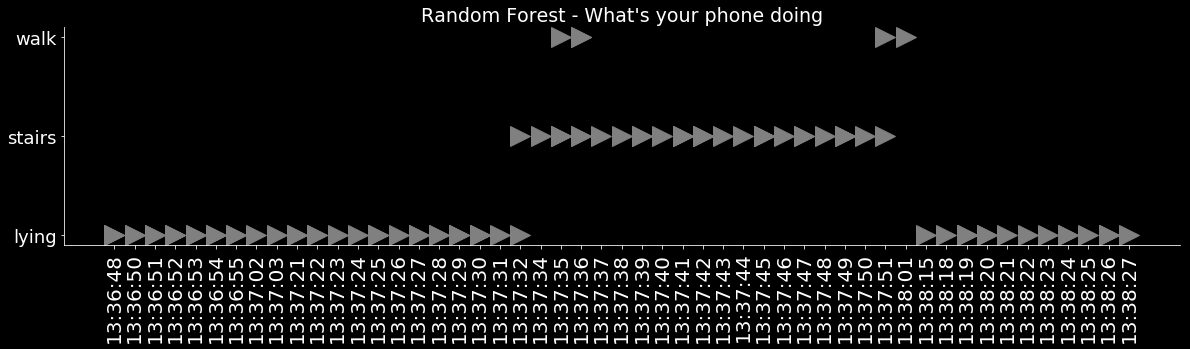

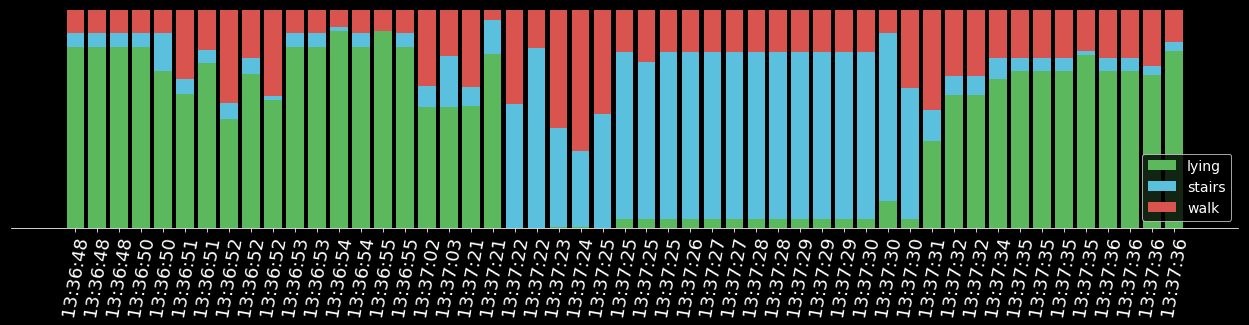

In [84]:
###initiate resulting df
final_result = pd.DataFrame()

###get recent data
test_data, test_labels, timestamps = get_recent_data(sensor_id=None)

###convert timestamps to readable format
the_time = pd.Series(timestamps).apply(convert_timestamps)

###class predictions Random Forest
prediction_classes_RF = best_model_RandomForest.predict(test_data)

###proba predictions Random Forest
probabilities_RF = best_model_RandomForest.predict_proba(test_data)

###proba predictions Feed Forward NN
probabilities_NN = NN_model.predict(StandardScaler().fit_transform(np.array(test_data)))

final_result["Timestamp"] = timestamps
final_result["Time"] = the_time
final_result["What you do (RF)"] = prediction_classes_RF

## generate data to plot probabilities
final_res_with_probas_RF = pd.concat([final_result, pd.DataFrame(probabilities_RF)], axis=1)

final_result = final_result.sort_values(by="Timestamp", axis=0, ascending=False)

plot_whatudo(final_result,show_last=100)
plot_whatudo_probas(final_res_with_probas_RF, show_last=100)

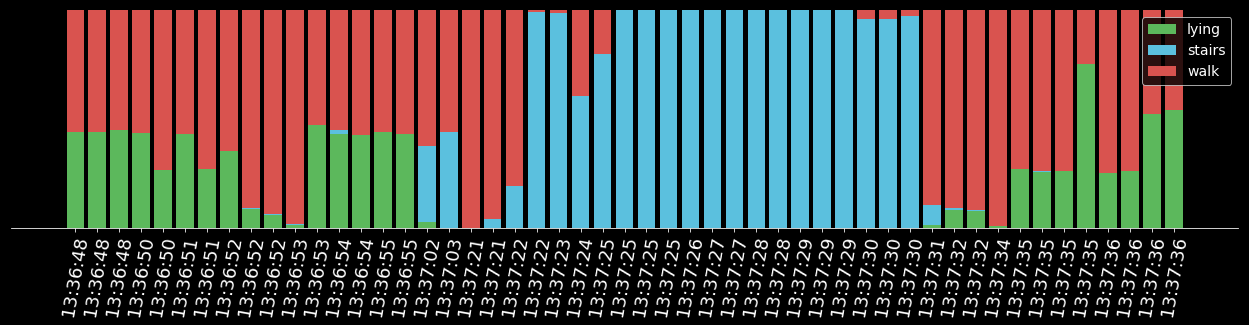

In [85]:
#### normalize NN predictions to 100%
lying = pd.DataFrame(probabilities_NN).apply(lambda x: x[0]/(x[0]+x[1]+x[2]), axis=1)
stairs = pd.DataFrame(probabilities_NN).apply(lambda x: x[1]/(x[0]+x[1]+x[2]), axis=1)
walking = pd.DataFrame(probabilities_NN).apply(lambda x: x[2]/(x[0]+x[1]+x[2]), axis=1)
final_res_with_probas_NN = pd.concat([final_result, pd.Series(lying), pd.Series(stairs), pd.Series(walking)], axis=1)

##plot
plot_whatudo_probas(final_res_with_probas_NN, show_last=100)